# HW 1 Part 2: Preprocessing Bank Marketing Dataset

The original dataset is available here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
We have a modified subset of this dataset to practice data  preprocessing. 

Perform the following tasks on the provided bank marketing dataset (bank-hw1.csv contains the dataset and bank-names.txt contains the description of the original dataset). High pass and low pass specifications are on Canvas. Please note that ALL questions labelled [LP] must be completed satisfactorily to receive a low pass on the assignment. The [HP] question specifications combine all parts of the homework. Please refer to Canvas for more details.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

In [1278]:
## Your code goes here. Import the csv into a pandas dataframe here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./bank-hw1.csv', header=None, na_values="?")

[LP 1] Deal with the erroneous values in the dataset. 
[LP 2] Deal with the missing values in the dataset. 

Below is necessary information about the columns that contain missing and erroneous values:

1. Age: must be in the range 18-100 
2. Job: case insensitive field, column contains clerical errors where extra dots or punctuations are left in the entries 
3. Marital: marital status is case insensitive; short forms of the entries refer to the same value (e.g., div is the same as divorced); there are typographical errors in the entries
4. Day and month: some entries have both these values combined in one column 
5. Duration: all entries must be non-negative

The set of possible values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices even if you only took a guess. 



In [1279]:
df.info()


"""
17 attributes, the last is an output as explained in names text file. 
2252 instances for each attribute.
Dtype for all attributes is object or categorical types. 
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2252 non-null   object
 1   1       2248 non-null   object
 2   2       2252 non-null   object
 3   3       2143 non-null   object
 4   4       2252 non-null   object
 5   5       2252 non-null   object
 6   6       2252 non-null   object
 7   7       2252 non-null   object
 8   8       2252 non-null   object
 9   9       2249 non-null   object
 10  10      2250 non-null   object
 11  11      2247 non-null   object
 12  12      2250 non-null   object
 13  13      2249 non-null   object
 14  14      2252 non-null   object
 15  15      2163 non-null   object
 16  16      2252 non-null   object
dtypes: object(17)
memory usage: 299.2+ KB


'\n17 attributes, the last is an output as explained in names text file. \n2252 instances for each attribute.\nDtype for all attributes is object or categorical types. \n'

In [1280]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,47,management,married,tertiary,no,-315,yes,yes,cellular,27,aug,112,9,-1,0,unknown,no
2,42,management,married,tertiary,no,0,no,no,cellular,26,aug,179,16,-1,0,unknown,no
3,25,student,single,secondary,no,154,no,no,cellular,2,sep,382,1,183,3,success,yes
4,49,housemaid,divorced,secondary,no,267,no,no,telephone,9,feb,23,5,-1,0,unknown,no



column 0 - age is numeric

column 4 - default means if a person has credit in default

column 5 - balance shows average annual balance (should be numeric)

column 6 - housing loan

column 7 - personal loan

column 9 - last contact day of the month (numeric)

column 10 - last contact month of the year

column 11 - duration of last contact in seconds (numeric)

column 12 - number of contacts performed during current campaign and for this client (numeric)

column 13 - pdays is number of days that passed by since a client was contacted from a previous campaign, -1 means no contact (numeric)

column 14 - previous means number of contacts performed before this campaign for this client (numeric)

column 15 - poutcome is outcome of the previous marketing campaign

column 16 - the outcome of campaign, has the client subscribed for a term deposit? 


In [1281]:
#don't want to use the labels for the columns to preprocess data, removing first row from all columns
df = df.iloc[1:,:]

In [1282]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,47,management,married,tertiary,no,-315,yes,yes,cellular,27,aug,112,9,-1,0,unknown,no
2,42,management,married,tertiary,no,0,no,no,cellular,26,aug,179,16,-1,0,unknown,no
3,25,student,single,secondary,no,154,no,no,cellular,2,sep,382,1,183,3,success,yes
4,49,housemaid,divorced,secondary,no,267,no,no,telephone,9,feb,23,5,-1,0,unknown,no
5,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no


In [1283]:
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
dtype: object

In [1284]:
# need to make sure columns that are numeric as described in names file are converted to numeric first
#df[0] = pd.to_numeric(df[0])
#only column unable to convert is 9 = days, has erroneous values
df[[0,5,11,12,13,14]]=df[[0,5,11,12,13,14]].apply(pd.to_numeric)

In [1285]:
df.dtypes

0       int64
1      object
2      object
3      object
4      object
5       int64
6      object
7      object
8      object
9      object
10     object
11    float64
12    float64
13    float64
14      int64
15     object
16     object
dtype: object

In [1286]:
df[0].value_counts()

31     103
34      97
35      94
32      93
33      91
      ... 
127      1
67       1
228      1
255      1
295      1
Name: 0, Length: 67, dtype: int64

In [1287]:
df[0].describe()

count    2251.000000
mean       41.395824
std        13.474722
min         2.000000
25%        33.000000
50%        39.000000
75%        49.000000
max       295.000000
Name: 0, dtype: float64

In [1288]:

range = 18
col = df[0]

count = col[col < range].count()
print(count)

1


In [1289]:
range = 100
col = df[0]

count = col[col > range].count()
print(count)

4


In [1290]:
df[0] = df[0].replace({127,228,255,295}, 41)

In [1291]:
count = (df[0] > 100).sum()
print(count)

0


In [1292]:
count = (df[0]<18).sum()
print(count)

1


In [1293]:
df[0] = df[0].replace(2, 41)

In [1294]:
count = (df[0]<18).sum()
print(count)

0


(array([ 59., 399., 542., 407., 308., 324., 168.,  14.,  16.,  14.]),
 array([19. , 25.2, 31.4, 37.6, 43.8, 50. , 56.2, 62.4, 68.6, 74.8, 81. ]),
 <BarContainer object of 10 artists>)

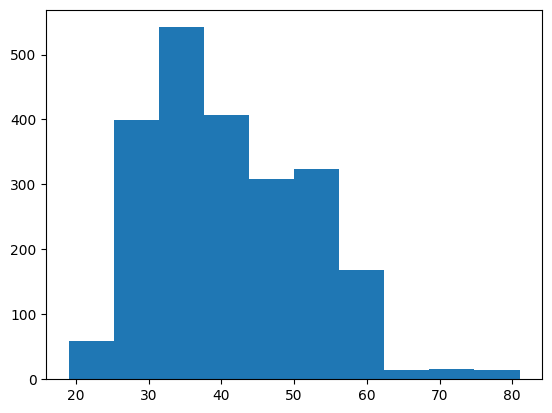

In [1295]:
plt.hist(df[0])

After, replacing out of range age values, I plotted the column for age. The histogram shows all values are below age 100, but unable to see range for 18 as I did not use bins. However, checking to see if the age column has any values below age of 18 returns 0. Therefore, all values for this column are within the range of 18 to 100. 

In [1296]:
#Get rid of unwanted punctuation in Job column 
df[1] = df[1].str.replace('[^\w\s]+', '', regex=True)

In [1297]:
df[1].str.contains('[^\w\s]+').any()

False

Replaced all punctuation marks from all job description values in job column using regex string replace. Checked to see if any string in the column still contains a special character, returned False. 

In [1298]:
df[1].head(10)

1     management
2     management
3        student
4      housemaid
5     bluecollar
6     bluecollar
7     management
8     technician
9          admin
10    bluecollar
Name: 1, dtype: object

In [1299]:
df[1].value_counts()

management      465
bluecollar      463
technician      383
admin           273
services        197
retired         111
entrepreneur     81
selfemployed     77
housemaid        64
student          57
unemployed       57
unknown          18
None              1
Name: 1, dtype: int64

In [1300]:
df[2].value_counts()

married     1350
single       635
divorced     243
div            5
M              4
Single         4
1              3
Div            2
Married        2
maried         1
mairied        1
marirred       1
Name: 2, dtype: int64

In [1361]:
#Get rid of typos in marital column, check with value counts of typos that exists and replace them with correct categories. 
df[2] = df[2].replace({'div':'divorced','M':'married', 'Single':'single','Div':'divorced','Married':'married', 'maried':'married','mairied':'married', 'marirred':'married', '1':'married'})

In [1362]:
df[2].value_counts()

married     1350
single       633
divorced     249
Name: 2, dtype: int64

In [1363]:
df[9].value_counts()

20    111
7     104
17    101
5      96
28     95
18     95
14     94
21     92
6      92
29     90
15     88
8      86
30     85
13     83
9      79
16     79
11     78
2      77
12     77
4      74
19     69
27     65
26     61
3      50
23     37
25     36
31     35
22     33
10     27
24     23
1      20
Name: 9, dtype: int64

In [1364]:
checking = (df[9].str.contains("-")).sum()
print(checking)

0


In [1365]:
df[9] = df[9].replace('18-Nov','18')
df[9] = df[9].replace('5-Jun', '5')

In [1366]:
checking = (df[9].str.contains("-")).sum()
print(checking)

0


In [1367]:
checking = (df[10].str.contains("-")).sum()
print(checking)

0


In [1368]:
df[10].value_counts()

may    713
jul    346
aug    300
jun    241
nov    176
feb    142
apr    141
jan     53
oct     47
sep     35
mar     28
dec     10
Name: 10, dtype: int64

In [1369]:
df[10] = df[10].replace({'20-Apr':'apr','28-Jul':'jul', '27-Aug':'aug','8-Aug':'aug','22-Aug':'aug', 'maried':'married','August':'aug', 'august':'aug'})

In [1370]:
df[10].value_counts()

may    713
jul    346
aug    300
jun    241
nov    176
feb    142
apr    141
jan     53
oct     47
sep     35
mar     28
dec     10
Name: 10, dtype: int64

Done correcting day and month columns.

In [1371]:
check = (df[11] < 0).sum()
print(check)

0


In [1372]:
df[11] = np.abs(df[11])

In [1373]:
check = (df[11]<0).sum()
print(check)

0


In [1374]:
## Your code for LP 2 goes here.

In [1375]:
df[0].isnull().sum()

0

In [1376]:
df[1].isnull().sum()

0

In [1377]:
df[2].isna().sum()

0

In [1378]:
df[3].isna().sum()

0

In [1379]:
df[4].isna().sum()

0

In [1380]:
df[5].isna().sum()

0

In [1381]:
df[6].isnull().sum()

0

In [1382]:
df[7].isnull().sum()

0

In [1383]:
df[8].isnull().sum()

0

In [1384]:
df[9].isnull().sum()

0

In [1385]:
df[10].isnull().sum()

0

In [1386]:
df[11].isnull().sum()

0

In [1387]:
df[12].isnull().sum()

0

In [1388]:
df[13].isnull().sum()

0

In [1389]:
df[14].isnull().sum()

0

In [1390]:
df[15].isnull().sum()

0

In [1391]:
df[16].isnull().sum()

0

In [1392]:
df = df.dropna(subset=[1,9,10,11,12,13])
#df[3].isna().sum()

In [1393]:
df[3] = df[3].fillna(df[3].value_counts().first_valid_index())

In [1394]:
df[3].isna().sum()

0

In [1395]:
df[15] = df[15].fillna(df[15].value_counts().first_valid_index())

In [ ]:
df[15].value_counts()

unknown    1920
failure     251
success      80
Name: 15, dtype: int64

In [1396]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

### LP1 Explanation:

1. For the Age column, itendified how many values were outside of the specified 18-100 range and using custom code and were replaced with the mean value of the attribute, 41, using the replace method in pandas. 

2. For the Job column, to remove unwanted punctuation, used regex and str.replace() function to remove any strings in the column that contained punctuation marks. 

3. For the Marital column, checked categories using value_counts() and identified all those that were misspelled or abbriviated. Replaced all of the misspelled or abbriviated values with their correct categorical terms. 

4. For the day and month columns, checked to see how many values contained a "-" hyphen and using value_counts() was able to identify the values. Replaced those particular values with correct information. For the month column, it also contained two different categories for the month of august spelled out, replaced those with "aug" as well. 

5. For the duration column, checked using a limit to see if the column had any values less than 0. It contained 4 which were then converted to positive integers using np.abs() function. 


###  LP2 Explanation
##### Columns with missing values:

1. job, df[1],   4 missing 

2. education,   df[3],   109 missing

3. day,         df[9],   3 missing

4. month,       df[10],  2 missing

5. duration,    df[11],  5 missing

6. pdays,       df[13],  3 missing

7. poutcomes,   df[15],  89 missing

 For columns 1, 9, 10, 11, and 3: since the missing values are really low, I will drop them. 

 For column 3, which is education, I will fill in null values with the mode of the attribute

 For column 15, which is poutcome, I will fill in null values with attribute mode. 

[LP 3] Use encoders and convert the categorical variables to numerical values.

In [1397]:
df.shape

(2232, 17)

(array([1.708e+03, 3.550e+02, 1.010e+02, 4.700e+01, 1.400e+01, 4.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 3.3310e+02, 6.6520e+02, 9.9730e+02, 1.3294e+03,
        1.6615e+03, 1.9936e+03, 2.3257e+03, 2.6578e+03, 2.9899e+03,
        3.3220e+03]),
 <BarContainer object of 10 artists>)

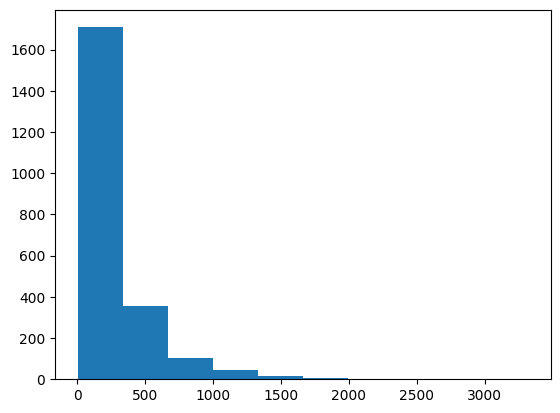

In [1398]:
plt.hist(df[11])

In [1399]:
## Your code for LP 3 goes here. 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# label encoder using sklearn preprocessing
t1 = pd.DataFrame(le.fit_transform(df[1]))
t3 = pd.DataFrame(le.fit_transform(df[3]))
t9 = pd.DataFrame(le.fit_transform(df[9]))
t10 = pd.DataFrame(le.fit_transform(df[10]))

df_le = pd.concat([t1,t3,t9,t10], axis=1)
# one hot encoding using pd.get_dummies
t2 = pd.get_dummies(df[2])
t4 = pd.get_dummies(df[4])
t6 = pd.get_dummies(df[6])
t7 = pd.get_dummies(df[7])
t8 = pd.get_dummies(df[8])
t15 = pd.get_dummies(df[15])
t16 = pd.get_dummies(df[16])

df_ohe = pd.concat([t2,t4,t6,t7,t8,t15,t16], axis=1)

df_original = pd.concat([df[0], df[5],df[11], df[12], df[13], df[14]], axis=1)

df_encoded = pd.concat([df_original, df_le, df_ohe], axis = 1)

print(df_encoded)

         0      5     11    12     13   14     0    0     0     0  ...   no  \
1     47.0 -315.0  112.0   9.0   -1.0  0.0   5.0  2.0  18.0   1.0  ...  0.0   
2     42.0    0.0  179.0  16.0   -1.0  0.0   9.0  1.0  11.0  11.0  ...  1.0   
3     25.0  154.0  382.0   1.0  183.0  3.0   4.0  1.0  30.0   3.0  ...  1.0   
4     49.0  267.0   23.0   5.0   -1.0  0.0   2.0  0.0  15.0   8.0  ...  1.0   
5     25.0 -221.0  250.0   1.0   -1.0  0.0   2.0  1.0   8.0   0.0  ...  1.0   
...    ...    ...    ...   ...    ...  ...   ...  ...   ...   ...  ...  ...   
1789   NaN    NaN    NaN   NaN    NaN  NaN   5.0  2.0   8.0   1.0  ...  NaN   
1949   NaN    NaN    NaN   NaN    NaN  NaN   1.0  1.0  19.0   3.0  ...  NaN   
2005   NaN    NaN    NaN   NaN    NaN  NaN   2.0  1.0  20.0   8.0  ...  NaN   
2007   NaN    NaN    NaN   NaN    NaN  NaN   3.0  2.0  11.0   3.0  ...  NaN   
2013   NaN    NaN    NaN   NaN    NaN  NaN  10.0  1.0  28.0   1.0  ...  NaN   

      yes  cellular  telephone  unknown  failure  s

(array([[2.232e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.076e+03, 1.130e+02, 2.500e+01, 1.000e+01, 4.000e+00, 1.000e+00,
         0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
        [2.232e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.232e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.232e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.232e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.232e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.232e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

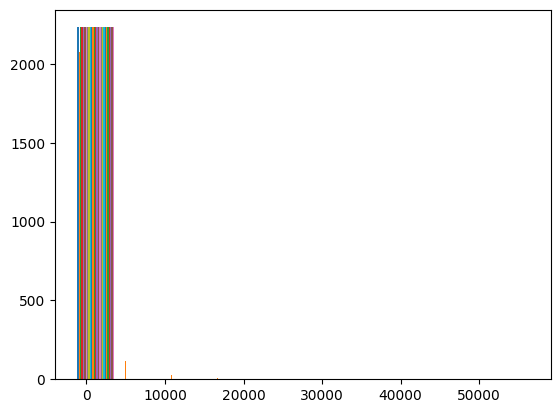

In [1400]:
plt.hist(df_encoded)

[HP 1] Describe your choices to preprocess these columns and explain why they are appropriate for the column.

1. column 0 - age is numeric
2. column 1 - job
3. column 2 - marital
4. column 3 - education
5. column 4 - default means if a person has credit in default
6. column 5 - balance shows average annual balance (should be numeric)
7. column 6 - housing loan
8. column 7 - personal loan 
9. column 8 - contact
10. column 9 - last contact day of the month (numeric)
11. column 10 - last contact month of the year
12. column 11 - duration of last contact in seconds (numeric)
13. column 12 - number of contacts performed during current campaign and for this client (numeric)
14. column 13 - pdays is number of days that passed by since a client was contacted from a previous campaign, -1 means no contact (numeric)
15. column 14 - previous means number of contacts performed before this campaign for this client (numeric)
16. column 15 - poutcome is outcome of the previous marketing campaign
17. column 16 - the outcome of campaign, has the client subscribed for a term deposit?

Prior to data cleaning, I looked at the names text file for description about the bank dataset. 

I left the label out for each column at row iloc 0 for the dataframe. 

Many columns are meant to be numeric, but are categorical. To correct inconsistent data, I first converted the dtypes of columns: age, balance, duration, campaign, pdays, and previous to numeric.

* Note: column for day is also described as numeric, however since there were errorenous values, unable to convert to numeric at first. 

After these general steps, corrected inconsistent data as described in LP1 explanation. 

Then handled missing values by either dropping them or filling them in with their attribute mode as described in LP2 explanation. 

In terms of encoding, I used One-Hot Encoder for the following columns:
* marital
* default 
* housing
* loan
* contact
* poutcome
* y

I used Label Encoder for the following columns:
* job
* education
* day
* month

* Note: many columns dtypes were converted to numeric prior to data cleaning for efficieny in replacing inconsistent data. 

When encoding categorical columns to numeric, I separated columns with more the 3 categories to use Label Encoding because it would keep the dimentionality of the dataset the same and is faster at handling multiple categories. It is also more efficient on data that has some type of order or ranking like the education column, the month column, and the job column. Education has 3 levels in this dataset. There are 12 months in a year which can be ordered. Also, sometimes jobs can provide insight into the clients. For instance one can assume if a client is a student, they make less than a client that is a manager. 

Columns with 3 or less categories were encoded using One-Hot Encoding with the pandas get_dummies() function for the means of quick data cleaning. If this data were to be applied on a machine learning model, I would use sklearn.preprocessing's OneHotEncoder() as it can handle unknown categories by default and it saves exploded categories which is helpful when fitting the model to test data. But for the purpose of this dataset, I was more concerned about data cleaning in an efficient manner. 

Columns like marital, default, housing, loan, contact, poutcome, and y have 3 or less categories. Also, most of them have a Yes/No category or don't follow an order. Hence, I chose to apply one-hot encoding on these particular columns. The only downside is, the number of dimensions after encoding did increase as once hot encoding creates a new column for every unique category. 

At last, scaling the data required a bit of thinking. 


[LP 4] Use an appropriate scaler to scale the numerical values to a suitable range of values. Briefly explain the process you used.

In [1401]:
## Your code for LP 4 goes here. 
from sklearn.preprocessing import MinMaxScaler

def preprocess_scaler(df_encoded):
    scaler = MinMaxScaler(feature_range=(0,1))
    return scaler.fit_transform(df_encoded)

In [1402]:
clean_array = preprocess_scaler(df_encoded)
print(clean_array)

[[0.4516129  0.02416284 0.03342367 ... 1.         1.         0.        ]
 [0.37096774 0.02954185 0.05359831 ... 1.         1.         0.        ]
 [0.09677419 0.03217158 0.11472448 ... 0.         0.         1.        ]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(array([[5.700e+01, 3.950e+02, 5.370e+02, 4.040e+02, 3.630e+02, 2.650e+02,
         1.670e+02, 1.400e+01, 1.600e+01, 1.400e+01],
        [2.076e+03, 1.130e+02, 2.500e+01, 1.000e+01, 4.000e+00, 1.000e+00,
         0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
        [1.708e+03, 3.550e+02, 1.010e+02, 4.700e+01, 1.400e+01, 4.000e+00,
         2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
        [2.020e+03, 1.560e+02, 2.700e+01, 2.000e+01, 7.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
        [1.835e+03, 1.110e+02, 1.210e+02, 5.800e+01, 9.700e+01, 5.000e+00,
         3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00],
        [2.127e+03, 7.500e+01, 1.600e+01, 5.000e+00, 3.000e+00, 3.000e+00,
         1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00],
        [2.720e+02, 4.600e+02, 7.900e+01, 6.400e+01, 4.620e+02, 1.860e+02,
         1.970e+02, 5.600e+01, 3.810e+02, 7.500e+01],
        [3.140e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.266e+03,
         0.000e+00, 0.

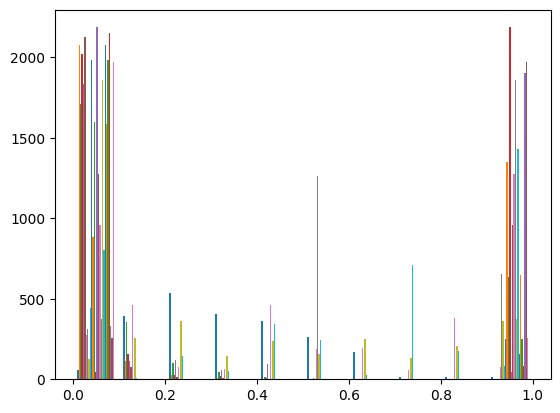

In [1403]:
plt.hist(clean_array)

<AxesSubplot: >

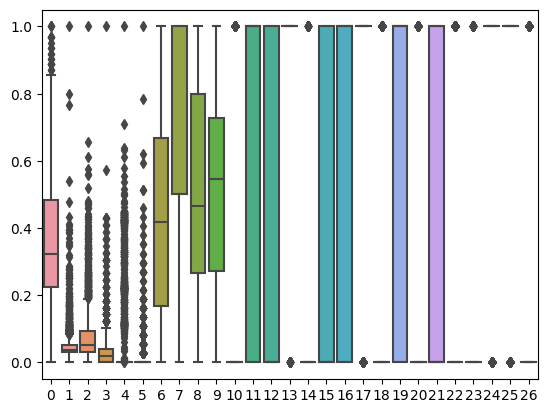

In [1404]:
sns.boxplot(clean_array)

Save your clean dataset in a file called **bank_clean.csv**. Submit this file along with the ipynb solution file. 

In [1405]:
## Your code to save the dataframe to a csv file goes here. 

bank_cleandf = pd.DataFrame(clean_array)
bank_cleandf.to_csv('bank_clean.csv', index=False)

In [1406]:
bank_cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2232 non-null   float64
 1   1       2232 non-null   float64
 2   2       2232 non-null   float64
 3   3       2232 non-null   float64
 4   4       2232 non-null   float64
 5   5       2232 non-null   float64
 6   6       2232 non-null   float64
 7   7       2232 non-null   float64
 8   8       2232 non-null   float64
 9   9       2232 non-null   float64
 10  10      2232 non-null   float64
 11  11      2232 non-null   float64
 12  12      2232 non-null   float64
 13  13      2232 non-null   float64
 14  14      2232 non-null   float64
 15  15      2232 non-null   float64
 16  16      2232 non-null   float64
 17  17      2232 non-null   float64
 18  18      2232 non-null   float64
 19  19      2232 non-null   float64
 20  20      2232 non-null   float64
 21  21      2232 non-null   float64
 22  

[HP 2] What is the average duration of calls made in the month of November? Plot a histogram of call duration in the month of November.

(array([441.,  10., 142.,  53., 346., 241.,  28., 713., 176.,  82.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

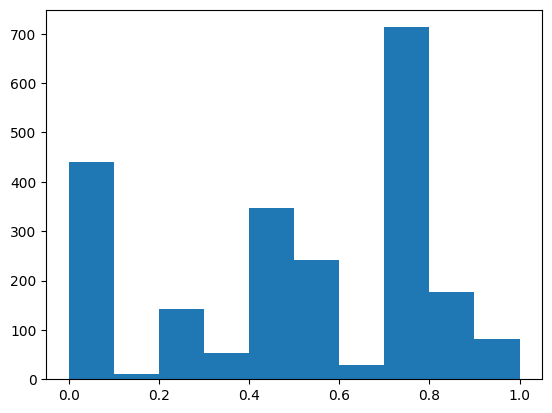

In [1407]:
## Your code for HP 2 goes here. 
plt.hist(bank_cleandf[9])

[HP 3] How many times on an average were customers whose "poutcome" was "success" contacted previously ("previous" column contains this information)? How does this compare to the customers whose "poutcome" was "failure" or "other"? What insight does this step provide for the business objective of having a successful campaign? 

In [1409]:
## Your code for HP 3 goes here. 
df[15].value_counts()
#plt.hist(bank_cleandf[19])

unknown    1903
failure     249
success      80
Name: 15, dtype: int64

(array([1903.,    0.,    0.,    0.,    0.,   80.,    0.,    0.,    0.,
         249.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

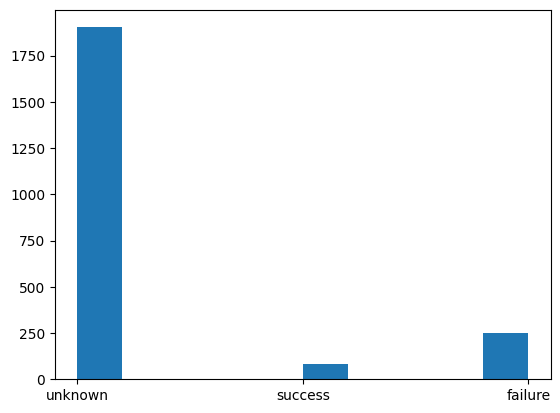

In [1414]:
plt.hist(df[15])

In [1419]:
df[14].value_counts()

0     1813
1      149
2      108
3       57
4       36
5       15
6       13
7       11
10       6
11       5
8        3
13       2
12       2
19       2
9        2
29       1
14       1
22       1
16       1
37       1
15       1
17       1
23       1
Name: 14, dtype: int64

In [1421]:
df[14].describe()

count    2232.000000
mean        0.594982
std         2.048041
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        37.000000
Name: 14, dtype: float64

(array([2.127e+03, 7.500e+01, 1.600e+01, 5.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

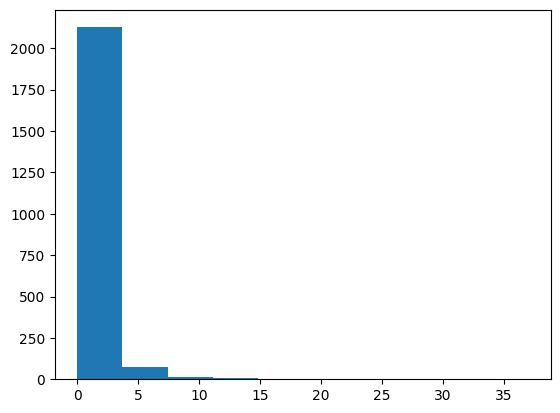

In [1415]:
plt.hist(df[14])

Customers who's poutcome was success were contacted approximately 3 times on avg. Given the average of previous contact is around 59 and the number of success is 80. 

# References
Include ALL your references here. 

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository
3. The bank_clean.csv file

